# Comparison of Techniques for Mapping Streams


### Motivation
In this notebook, we will explore different numerical methods to map solar wind streams from different locations in the heliosphere. Moreover, we will examine the numerical difficulties of each method in an attempt to find the optimal method to capture the wave propagation without adding artificial oscillation or "numerical viscosity".


#### References

[1] Riley, P., and Lionello, R., “Mapping Solar Wind Streams from the Sun to 1 AU: A Comparison of Techniques,”Solar Phys.,Vol. 270, 2011, pp. 575–592. doi:10.1007/s11207-011-9766-x.


[2] Riley, P., and Issan, O., “Using a Heliospheric Upwinding eXtrapolation Technique to Magnetically Connect Different Regions of the Heliosphere,” Frontiers in Physics, Vol. 9, 2021, p. 268.  doi:10.3389/fphy.2021.679497.


[3] Snyder, C. W., and Neugebauer, M., “The relation of Mariner-2 plasma data to solar phenomena,”The Solar Wind, edited by R. J.Mackin and M. Neugebauer, Permanon Press, Oxford, 1966, p. 25.


[4] LeVeque, R. J.,Numerical methods for conservation laws (2. ed.)., Lectures in mathematics, Birkhäuser, 1992.

## The Underlying Partial Differential Equation (PDE)

The solar wind motion can be described as the fluid momentum equation in corotating frame of reference:
	
$$
-\Omega_{rot} \frac{\partial v}{\partial \phi} + (v \cdot \nabla)v = \frac{1}{\rho} \nabla P - \frac{G M_{s}}{r^2}e_{r}
$$

By neglecting magnetic field, pressure gradient, and gravity, the fluid momentum equation reduces to the inviscid Burgers' equation, which is the simplest model that includes nonlinearity and viscous effects of fluids dynamics:

$$
\frac{\partial v_{r}}{\partial \phi} -\frac{1}{\Omega_{rot}}v_{r}\frac{ \partial v_{r}}{\partial r}=0
$$

Where $r$ denotes the radial distance from the Sun and $\phi$ denotes Carrington longitude in Heliographic (rotating) Coordinate System (HG). The Cauchy problem is defined by the equation above on the domain $ 0 < r < \infty$, $0 \leq \phi \leq 2 \pi$, where $\Omega_{rot}$ is the angular frequency of the Sun's rotation, equal to $\frac{2 \pi}{25.38} \text{ days}$ at the solar equator. The initial condition is
$$
v_{r}(\phi, r_{0}) = v_{r_{0}}(\phi)
$$

with periodic boundary conditions, such that $v_{r} (0, r) = v_{r} (2\pi, r)$ for all radial locations in the problem's domain. 

<!--- In order to propagate Parker Solar Probe (PSP) solar wind velocity observations to OMNI (Earth). The initial condition will vary in $\phi$ and $r$ such that 

$$
v_{r}(\phi, r_{0}) = v_{r_{0}} \\
r_{0} = [r_{0}, r_{1}, ... r_{N}]^{T}
$$

Where $r_{0}$ is non-uniform since PSP varies in radial distance from the Sun in Heliographic (rotating) Coordinate System ,(HG). 
---> 

## First order Upwind Method (HUX-f/b)

The Heliospheric Upwind eXtrapolation Technqiue developed by Riley et al. [1] leverages the upwind numerical scheme to solve the equation above numerically. The HUX-f Technique maps solar wind streams from the Sun's corona ($\approx 30 R_\odot$) to Earth (1 AU), such that 

$$
-\Omega_{rot} \frac{v_{i, j+1} - v_{i, j}}{\Delta \phi} + 
v_{i, j}(\frac{v_{i+1, j} - v_{i, j}}{\Delta r}) = 0
$$

$$
v_{i+1, j}=  v_{i, j} + \frac{\Delta r\Omega_{rot}}{\Delta \phi}  (\frac{v_{i, j+1} - v_{i, j}}{v_{i, j}})
$$


Whereas HUX-b technique is also based on the first order upwind method, yet in downwind direction, such that the mapping technqiue is applied to near earth data and mapped back to the Sun. The HUX-b method is defined as:

$$
-\Omega_{rot} \frac{v_{i, j} - v_{i, j-1}}{\Delta \phi} + 
v_{i, j}(\frac{v_{i, j} - v_{i-1, j}}{\Delta r}) = 0
$$


$$
v_{i-1, j}=  v_{i, j} + \frac{\Delta r\Omega_{rot}}{\Delta \phi}  (\frac{v_{i, j}-v_{i, j-1}}{v_{i, j}})
$$

Where for simplicity the $r$ subscipt on the radial velocity is ommitted. The indicies $i$ and $j$ refer to $r$ and $\phi$ grids repectively. 

## Method of Characteristics
The method fo charateristics can be applied to quasilinear partial differential equations (PDEs) of the form 
$$
\frac{\partial \rho}{\partial t} + c \frac{\partial \rho}{\partial x} = Q
$$
where $c$ and $Q$ may be functions of $x$, $t$, and $\rho$. 
By the method of characteristics, we obtain that 
$$
\frac{\partial \rho}{\partial t} = Q
$$
if 
$$
\frac{\partial x}{\partial t} = c
$$

Hence, the PDE reduces to two coupled ordinary differential equations. The characteristics may be otained by integrating the equation above. 

In our application of the traveling solar waind plasma, the characteristics are as follows

$$
\frac{\partial v}{\partial \phi} = 0
$$
if 
$$
\frac{\partial r}{\partial \phi} = -\frac{1}{\Omega_{rot}}v_{r}
$$

consequently, the velocity remains constant along each characteritic since

$$
\frac{d}{d \phi} v(r, \phi) = \frac{\partial}{\partial \phi} v(r, \phi)  + \frac{\partial}{\partial r} v(r, \phi) \frac{\partial r}{\partial \phi} \\=  \frac{\partial}{\partial \phi} v(r, \phi) + \frac{\partial}{\partial r} v(r, \phi) (-\frac{1}{\Omega_{rot}}v_{r}) \\= 0
$$


Then by intergation of $\frac{\partial r}{\partial \phi} = -\frac{1}{\Omega_{rot}}v_{r}$ with respect to $r$, the characteristic are straight lines descibed by 

$$
\Delta \phi = -\frac{\Omega_{rot} (\Delta r)}{v_{r}}
$$

This approximation is called the *ballistic* approximation for mapping solar wind streams to different locations in the heliosphere [Snyder, 3]. It assumes that each parcel of plasma continues at a constant speed $v_{r}$ through out the heliosphere [Riley, 1]. The ballistic approximation holds when characteristic lines do not intersect, it is usually applied to mapping solar wind streams for short radial distances. This leads to the following section, where we will elaborate on the numerical difficulties that arise in shock formation.

# Shock waves

For quasilinear PDEs, it is quite usual for characteristics to intersect. When the characteristic lines first intersect the wave "breaks" and shock forms. From this point further the classical solution can not be obtained by the ballistic approximation, and the weak solution we hope to approximate becomes discontinuous [Leveque, 4]. This phenomena occurs when faster parcels catch up to the slower. As we move in the Heliosphere, the radial distance between the two particles decreases, resulting in a *compression wave*. 

To visualize the characteristic lines, lets import an initial velocity profile from the MHD solutions


In [1]:
from tools.MASweb import get_mas_path
from psipy.model import MASOutput
from psipy.data import sample_data
from psipy.model.variable import Variable
import numpy as np 
import matplotlib.pyplot as plt
from hux_propagation import *
import astropy.units as u
#%matplotlib notebook
plt.rcParams['savefig.facecolor'] = 'white'

In [2]:
# mas output - br, rho, vr
mas_path = get_mas_path(cr="2210")

model = MASOutput(mas_path)

print(model.variables)

['br', 'rho', 'vr']


In [3]:
# read in MHD velocity results. 
vr_model = model['vr']

In [4]:
# save MHD mesh coordinates Heliographic (rotating) Coordinate System (HG)
# phi - (0, 2pi)
p = vr_model.phi_coords
# sin(theta) - (-pi/2, pi/2)
t = vr_model.theta_coords
# 30 solar radii to approximately 1 AU
# 1 solar radii = 695,700 km
r = (vr_model.r_coords * u.solRad).to(u.km)
# change in r
dr = r[1:] - r[:-1]
# velocity profile 
f = vr_model.data
print(f.shape)

(128, 111, 140)


In [5]:
omega_rot = (2 * np.pi) / (25.38 * 86400)

In [6]:
v_at_30_radii_equator = np.array(f[:, 55, 0])
v_at_1_au_equator = np.array(f[:, 55, -1])

#### Breaking Point.

In order to determine the breaking point, consider two characteristics that arise from initial conditions $\phi$ and $\phi + \Delta \phi$. The characteristics starting at the two points will cross when

$$
R_{break} = \min_{\forall \phi, \Delta \phi \in [0, 2\pi]}(r_{0} + \frac{\Delta \phi}{\Omega_{rot}} \frac{v_{r_{0}}(\phi_{0}) v_{r_{0}}(\phi_{0} + \Delta \phi)}{v_{r_{0}}(\phi_{0}) - v_{r_{0}}(\phi_{0} + \Delta \phi)})
$$

The only way to acheive a solution after the characteristic lines cross is by allowing $v_{r}$ to be discontinuous, therefore, capture the shock wave. This requirement is established through the concept of a weak solution.  

In [7]:
r_min_intersection = np.inf
phi_meet_intersection = 0

phi0 = 0 
phi1 = 0 

num_intersection = 0 
phi_meet_vec = []
r_meet_vec = []

for ii in range(len(p)):     
    for jj in range(ii, len(p) -1):
        if ii != jj:
            deltap= (p[ii] - p[jj])
            num = v_at_30_radii_equator[ii] * v_at_30_radii_equator[jj]
            den = v_at_30_radii_equator[ii] - v_at_30_radii_equator[jj]
            
            res =  (r[0].value- (deltap/omega_rot)*(num/den))* u.km
             
            if  r[0] <  res < r[-1]:        
                num_intersection += 1
                
                phi_meet = p[ii] - omega_rot*(res.value - r[0].value)/(v_at_30_radii_equator[ii])
                
                phi_meet_vec.append(phi_meet)
                r_meet_vec.append(res.to(u.solRad).value)
                
                if res.value < r_min_intersection:
                    
                    r_min_intersection = res.value
                    phi_meet_intersection = phi_meet
                    phi0 = p[ii]
                    phi1 = p[jj]

In [8]:
print("minimum intersection = ", (r_min_intersection*u.km).to(u.solRad))
print("phi0 = ", phi0*(180/np.pi))
print("phi0 + delta", phi1*(180/np.pi))
print("number of intersecting characteristics in r domain", num_intersection)

minimum intersection =  77.85095698651513 solRad
phi0 =  222.18750170061884
phi0 + delta 224.99999601591165
number of intersecting characteristics in r domain 315


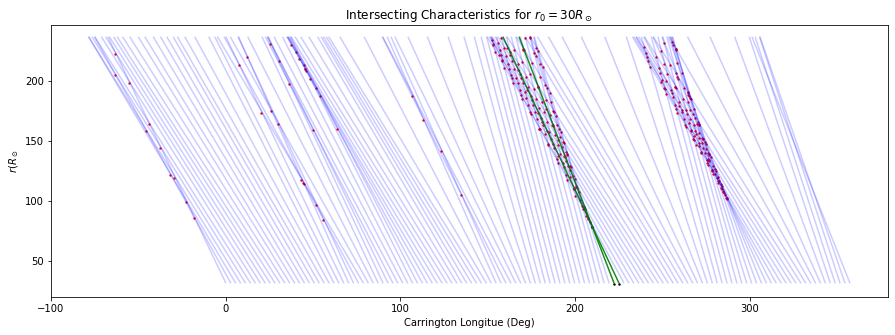

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,5), sharex=True)

jj = 0
for ii in p:
    if ii == phi0 or ii == phi1:
            ax.plot((ii - omega_rot*(dr.value)/(v_at_30_radii_equator[jj])*np.arange(r[1:].shape[0]))*(180/np.pi)
            , r[1:]/(695700), c="g", alpha=0.9)
    else:
        ax.plot((ii - omega_rot*(dr.value)/(v_at_30_radii_equator[jj])*np.arange(r[1:].shape[0]))*(180/np.pi)
                , r[1:]/(695700), c="b", alpha=0.2)
    jj+=1
    
ax.scatter(np.array(phi_meet_vec)*(180/np.pi), r_meet_vec, s=2, c="r", alpha=0.9)

ax.scatter(phi0*(180/np.pi), r[0].to(u.solRad), s=2, c="k")
ax.scatter(phi1*(180/np.pi), r[0].to(u.solRad), s=2, c="k")
ax.scatter(phi_meet_intersection*(180/np.pi), (r_min_intersection * u.km).to(u.solRad), s=2, c="k")

#ax.set_xlim(200,250)
ax.set_xlabel("Carrington Longitue (Deg)")
ax.set_ylabel("$r (R_\odot$")
ax.set_title("Intersecting Characteristics for $r_{0} = 30 R_\odot$")
plt.savefig('figures/analysis/intersecting_characteristics_alpha.png')

Text(0.5, 1.0, '$r = 1$ AU')

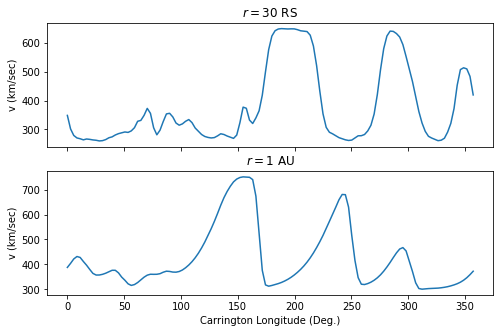

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (8,5), sharex=True)
ax[0].plot(p*(180/np.pi), v_at_30_radii_equator)
ax[0].set_ylabel("v (km/sec)")
ax[0].set_title("$r = 30$ RS")


ax[1].plot(p*(180/np.pi), v_at_1_au_equator)
ax[1].set_xlabel("Carrington Longitude (Deg.)")
ax[1].set_ylabel("v (km/sec)")
ax[1].set_title("$r = 1$ AU")

$$
\Delta \phi = -\frac{\Omega_{rot} (\Delta r)}{v_{r}}
$$

Text(0.5, 1.0, 'Intersecting Characteristics for $r_{0} = 1$ AU')

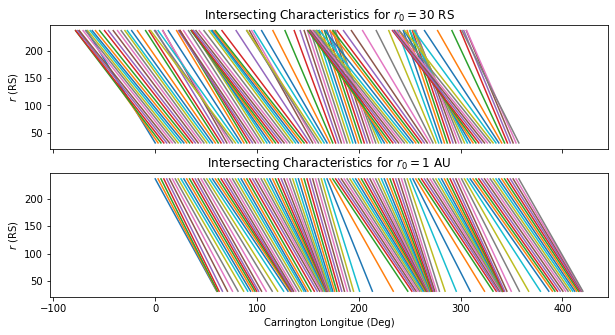

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (10,5), sharex=True)

jj = 0
for ii in p:
    ax[0].plot((ii - omega_rot*(dr.value)/(v_at_30_radii_equator[jj])*np.arange(r[1:].shape[0]))*(180/np.pi)
            , r[1:]/(695700))
    jj+=1
#ax[0].set_xlabel("Carrington Longitue (Deg)")
ax[0].set_ylabel("$r$ (RS)")
ax[0].set_title("Intersecting Characteristics for $r_{0} = 30$ RS")



jj = 0
for ii in p:
    ax[1].plot((ii - omega_rot*(-dr.value)/(v_at_1_au_equator[jj])*np.arange(r[1:].shape[0]))*(180/np.pi)
            , r[1:][::-1]/(695700))
    jj+=1
ax[1].set_xlabel("Carrington Longitue (Deg)")
ax[1].set_ylabel("$r$ (RS)")
ax[1].set_title("Intersecting Characteristics for $r_{0} = 1$ AU")

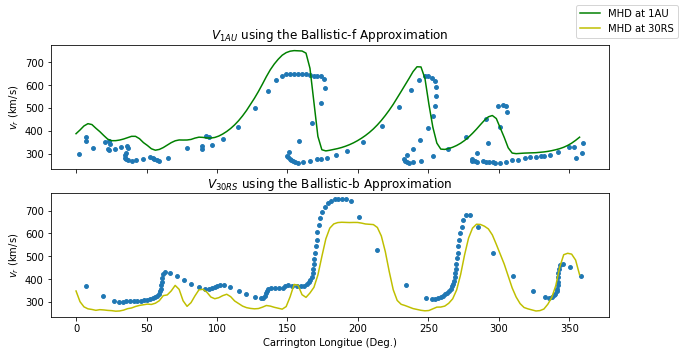

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (10,5), sharex=True)

phi_shift = -omega_rot*(-r[0].value +r[-1].value)/v_at_30_radii_equator
ax[0].scatter(((p + phi_shift) %(2*np.pi))*(180/np.pi), v_at_30_radii_equator, s=15)
ax[0].plot(p*(180/np.pi), v_at_1_au_equator, c="g", label="MHD at 1AU")
ax[0].set_ylabel("$v_{r}$ (km/s)")
ax[0].set_title("$V_{1AU}$ using the Ballistic-f Approximation")


phi_shift = -omega_rot*(-r[-1].value + r[0].value)/v_at_1_au_equator
ax[1].scatter(((p + phi_shift) %(2*np.pi))*(180/np.pi), v_at_1_au_equator, s=15)

ax[1].plot(p*(180/np.pi), v_at_30_radii_equator, c="y", label="MHD at 30RS")

ax[1].set_xlabel("Carrington Longitue (Deg.)")
ax[1].set_ylabel("$v_{r}$ (km/s)")
ax[1].set_title("$V_{30RS}$ using the Ballistic-b Approximation")
fig.legend()

Notice that the method of characteristics predicts the velocity becomes a **multivalued** function of carrington longitude. Meaning, at some location in longitude there are three velocities, as illustrated above. Hence, the velocity wave *breaks*. In some applications, a multivalued solutions is possible, such as breaking waves on a sloping beach. However, in our application, having three values of velocity at one place makes no sense, therefore the velocity function must be a single valued function of carrington longitude.

* **Proposition** If the initial propagation velocity of the solar wind is an increasing function of ($\phi$), then the velocity wave eventually "breaks" and becomes a multi-valued solution. 

* **Proof** Suppose that that $\phi_{1}$, $\phi_{2}$ are two points in Carrignton longitude ($\phi \in [0, 2\pi]$), where $\phi_{1} < \phi_{2}$ and $v_{\phi_{1}} < v_{\phi_{2}}$ where obviously $(v_{\phi_{2}}, v_{\phi_{2}} >0)$. Then, $$\frac{\Omega_{rot}}{v_{\phi_{1}}} > \frac{\Omega_{rot}}{v_{\phi_{2}}}$$ leading to $$-\frac{\Omega_{rot}}{v_{\phi_{1}}} <-\frac{\Omega_{rot}}{v_{\phi_{2}}}$$ where $\Omega_{rot}$ is the angular frequency of the Sun's rotation, equal to $\frac{2 \pi}{25.38} \text{ 1/ days}$ at the solar equator.  
Therefore, the characteristic emanating from $(\phi_{1}, r_{0})$ and $(\phi_{2}, r_{0})$ will intersect at some point $(\tilde \phi, \tilde r)$. After the intersection, the propogated wave becomes multivalued and "breaks".


The domain of dependence when solving the equation using the characteristic lines is a single point. Meaning, if we change the initial data at any point other than $\phi_{0}$ the solution $v_{r}(\phi_{0}, r)$ remains the same.

Text(0.5, 1.0, '$V_{1AU}$ using the HUX-f mapping technique')

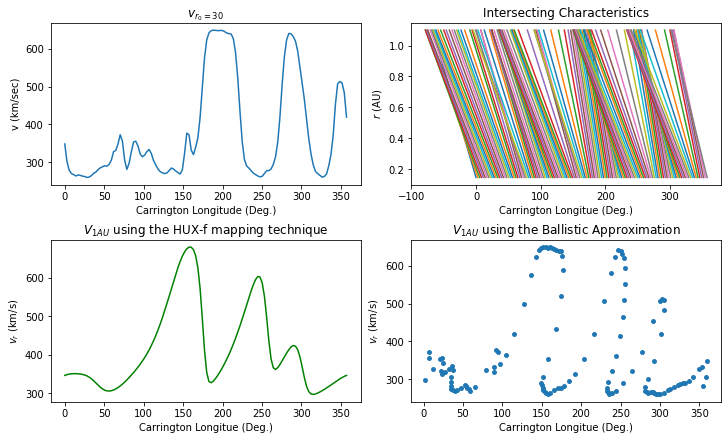

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True,figsize=(10, 6))
ax[0][0].plot(p*(180/np.pi), v_at_30_radii_equator)
ax[0][0].set_xlabel("Carrington Longitude (Deg.)")
ax[0][0].set_ylabel("v (km/sec)")
ax[0][0].set_title("$v_{r_{0}=30}$")


jj = 0
for ii in p:
    ax[0][1].plot((ii - omega_rot*(dr.value)/(v_at_30_radii_equator[jj])*np.arange(r[1:].shape[0]))*(180/np.pi)
            , r[1:]/(695700*215.032))
    jj+=1
ax[0][1].set_xlabel("Carrington Longitue (Deg.)")
ax[0][1].set_ylabel("$r$ (AU)")
ax[0][1].set_title("Intersecting Characteristics")

phi_shift = apply_ballistic_approximation(np.array(v_at_30_radii_equator), 
                r[-1].value - r[0].value, p)*180/np.pi
ax[1][1].scatter(phi_shift, v_at_30_radii_equator, s=15)
ax[1][1].set_xlabel("Carrington Longitue (Deg.)")
ax[1][1].set_ylabel("$v_{r}$ (km/s)")
ax[1][1].set_title("$V_{1AU}$ using the Ballistic Approximation")


ax[1][0].plot(p*180/np.pi, apply_forward_upwind_model(v_at_30_radii_equator, dr.value, p[1:] -p[:-1]),
            'g',label="HUX-f Technique")

ax[1][0].set_xlabel("Carrington Longitue (Deg.)")
ax[1][0].set_ylabel("$v_{r}$ (km/s)")
ax[1][0].set_title("$V_{1AU}$ using the HUX-f mapping technique")

Text(0.5, 1.0, '$V_{30RS}$ using the HUX-b mapping technique')

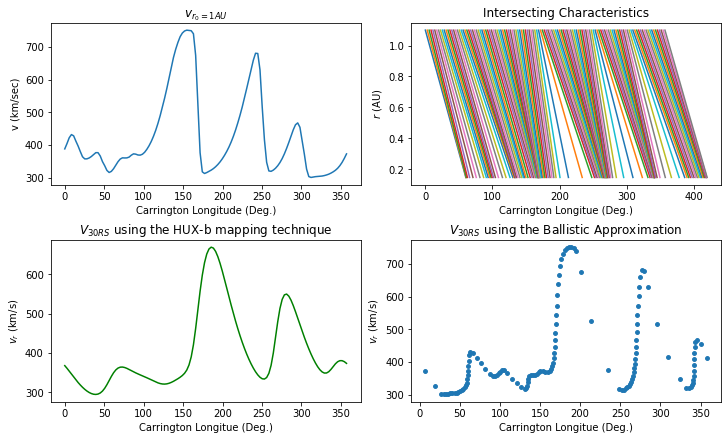

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True,figsize=(10, 6))
ax[0][0].plot(p*(180/np.pi), v_at_1_au_equator)
ax[0][0].set_xlabel("Carrington Longitude (Deg.)")
ax[0][0].set_ylabel("v (km/sec)")
ax[0][0].set_title("$v_{r_{0}=1AU}$")


jj = 0
for ii in p:
    ax[0][1].plot((ii - omega_rot*(-dr.value)/(v_at_1_au_equator[jj])*np.arange(r[1:].shape[0]))*(180/np.pi)
            , r[1:][::-1]/(695700*215.032))
    jj+=1
ax[0][1].set_xlabel("Carrington Longitue (Deg.)")
ax[0][1].set_ylabel("$r$ (AU)")
ax[0][1].set_title("Intersecting Characteristics")


phi_shift = apply_ballistic_approximation(np.array(v_at_1_au_equator), 
                -r[-1].value + r[0].value, p)*180/np.pi
ax[1][1].scatter(phi_shift, v_at_1_au_equator, s=15)
ax[1][1].set_xlabel("Carrington Longitue (Deg.)")
ax[1][1].set_ylabel("$v_{r}$ (km/s)")
ax[1][1].set_title("$V_{30RS}$ using the Ballistic Approximation")


ax[1][0].plot(p*180/np.pi, apply_backwards_upwind_model(v_at_1_au_equator, dr.value, p[1:] -p[:-1]),
            'g',label="HUX-f Technique")

ax[1][0].set_xlabel("Carrington Longitue (Deg.)")
ax[1][0].set_ylabel("$v_{r}$ (km/s)")
ax[1][0].set_title("$V_{30RS}$ using the HUX-b mapping technique")

#### When can we use the method of characteristics to approximate $v_{r}$?
For a small enough $\Delta r$, a solution can be constructed by following the characteristic lines. As long as the characteristic lines do not cross, we can approximate the solution using such assumtion. 

# Finite Volume Methods 
### Upwind (forward) first order approximation
The first order upwind method has a one-sided stencil. The upwind method results in physical solutions meaning it forces the $v_{r}(\phi)$ solution at any given $r$ to be a single-valued function. The first order upwind method can result in smeared solutions at discontinuities and severe numerical diffusion/dissipation. Note that the upwind method assumes that $v_{i, j} > 0$ $\forall i, j$ in the domain. This method enforces that the upwind direction is west. 

$$
-\Omega_{rot} \frac{v_{i, j+1} - v_{i, j}}{\Delta \phi} + 
v_{i, j}(\frac{v_{i+1, j} - v_{i, j}}{\Delta r}) = 0
$$

$$
v_{i+1, j}=  v_{i, j} + \frac{\Delta r\Omega_{rot}}{\Delta \phi}  (\frac{v_{i, j+1} - v_{i, j}}{v_{i, j}})
$$


### Upwind (forward) second order approximation 
The methods introduced hitherto were first order. Now, we will explore higher order methods,

$$
-\Omega_{rot} \frac{-3v_{i, j} + 4v_{i, j+1} - v_{i, j+2}}{2\Delta \phi} + 
v_{i, j}(\frac{v_{i+1, j} - v_{i, j}}{\Delta r}) = 0
$$


$$
v_{i+1, j}=  v_{i, j} + \frac{\Delta r\Omega_{rot}}{2\Delta \phi}  (\frac{-3v_{i, j} + 4v_{i, j+1} - v_{i, j+2}}{v_{i, j}})
$$

### Upwind (forward) Third order approximation
$$
-\Omega_{rot} \frac{-v_{i, j+2} + 6v_{i, j+1} - 3v_{i, j} -2v_{i, j-1}}{6\Delta \phi} + 
v_{i, j}(\frac{v_{i+1, j} - v_{i, j}}{\Delta r}) = 0
$$

$$
v_{i+1, j}=  v_{i, j} + \frac{\Delta r\Omega_{rot}}{6\Delta \phi}  (\frac{-v_{i, j+2} + 6v_{i, j+1} - 3v_{i, j} -2v_{i, j-1}}{v_{i, j}})
$$

Higher order upwind schemes are less diffusive compared to the first-order scheme. Yet, slight dispersive errors are introduced in the region where the gradient is high.

### Conservative (forward) upwind method
The upwind method described by HUX is sufficient for smooth solutions, yet in general, is not guaranteed to converge to a discontinuous weak solution.  The solution can consist of shock waves, rarefactions and compound wave. In order to enforce convergence, the PDE must be in conservative form instead of the quasilinear form. The conservation form of of our PDE:

$$
\frac{\partial v_{r}}{\partial \phi} -\frac{1}{\Omega_{rot}} \frac{\partial}{\partial r}(\frac{1}{2} v_{r}^2) =0
$$

Then, the derived upwind numerical method is

$$
v_{i+1, j}= \sqrt{ {v_{i, j}}^{2} + \frac{2\Delta r\Omega_{rot}}{\Delta \phi}  (v_{i, j+1} - v_{i, j})}
$$

Essentially, the conservative form ensures that the discretization technique actually represents a discrete approximation to the integral form of the conservation laws.

### Conservative Lax-Friedrichs Method
The Lax-Friedrich scheme is an explicit, first order scheme, using forward difference in $\phi$ and central difference in $r$. Notice that we treat $\phi$ as the time variable in the classical inviscid Burger's Equation and $r$ as the space dimension. The Lax-Friedrich method to this problem is of this form

$$
v_{i+1, j}= \frac{\Delta r \Omega_{rot}}{2\Delta \phi} ( -1  + \sqrt{1 + 4\frac{\Delta \phi}{\Delta r \Omega_{rot}}(2v_{i, j+1} - v_{i-1, j} + \frac{\Delta \phi}{\Delta r \Omega_{rot}} v_{i-1, j}^2)}
$$

### Non-applicable: MacCormack (4th order poly), Lax - Wendroff (3rd order poly), 

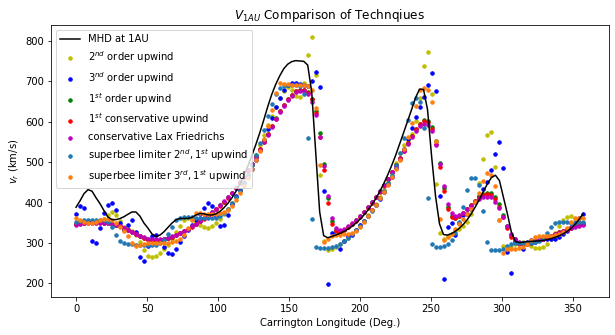

In [15]:
fig, ax = plt.subplots( figsize = (10,5), sharex=True)


_ = ax.scatter((p)*(180/np.pi), apply_second_order_f_upwind(v_at_30_radii_equator, dr.value, p[1:] -p[:-1])[-1, :], 
             c="y", s=12, label="$2^{nd}$ order upwind")

_ = ax.scatter((p)*(180/np.pi), apply_third_order_f_upwind(v_at_30_radii_equator, dr.value, p[1:] -p[:-1])[-1, :], 
             c="b", s=12, label="$3^{nd}$ order upwind")

_ = ax.scatter(p*180/np.pi, apply_forward_upwind_model(v_at_30_radii_equator, dr.value, p[1:] -p[:-1]),
             c="g", s=12,  label="$1^{st}$ order upwind")

_ = ax.scatter(p*180/np.pi, apply_conservative_f_upwind(v_at_30_radii_equator, dr.value, p[1:] -p[:-1])[-1, :],
            c="r", s=12,  label="$1^{st}$ conservative upwind")

_ = ax.scatter(p*180/np.pi, apply_conservative_lax_friedrichs(v_at_30_radii_equator, dr.value, p[1:] -p[:-1])[-1, :],
            c="m", s=12,  label="conservative Lax Friedrichs")

_ = ax.scatter(p*180/np.pi, apply_limiter_upwind(v_at_30_radii_equator, dr.value, p[1:] -p[:-1])[-1, :],
             s=12,  label="superbee limiter $2^{nd}, 1^{st}$ upwind")


_ = ax.scatter(p*180/np.pi, apply_3d_order_limiter_upwind(v_at_30_radii_equator, dr.value, p[1:] -p[:-1])[-1, :],
             s=12,  label="superbee limiter $3^{rd}, 1^{st}$ upwind")



_ = ax.plot(p*(180/np.pi), v_at_1_au_equator, c="k", label="MHD at 1AU")
_ = ax.set_ylabel("$v_{r}$ (km/s)")
_ = ax.set_xlabel("Carrington Longitude (Deg.)")
_ = ax.set_title("$V_{1AU}$ Comparison of Technqiues")
_ = plt.legend()

## 